In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

In [55]:
# show same images from the non-notebook example
import pycuda.autoinit
from pycuda import gpuarray
from matching import circle_image
import lagomorph as lm
width = 128
Jhost = np.concatenate(( circle_image(width, width, width*8//16, width//2, width//4)
                        ,circle_image(width, width, width*10//16, width//2, width//4)
                        #,circle_image(width, width, width*8//16, width//2, width*3//8)
                       )).astype(np.float32)
#Jhost = np.ascontiguousarray(Jhost[[1,0],...])
J = gpuarray.to_gpu(Jhost)

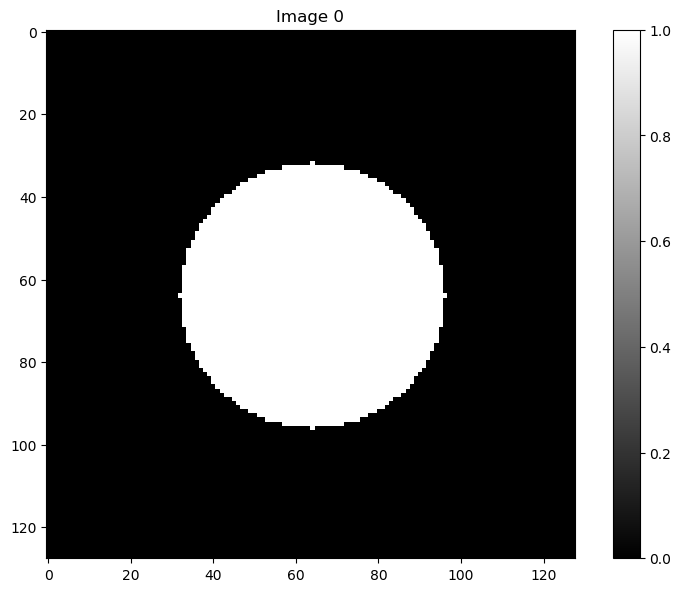

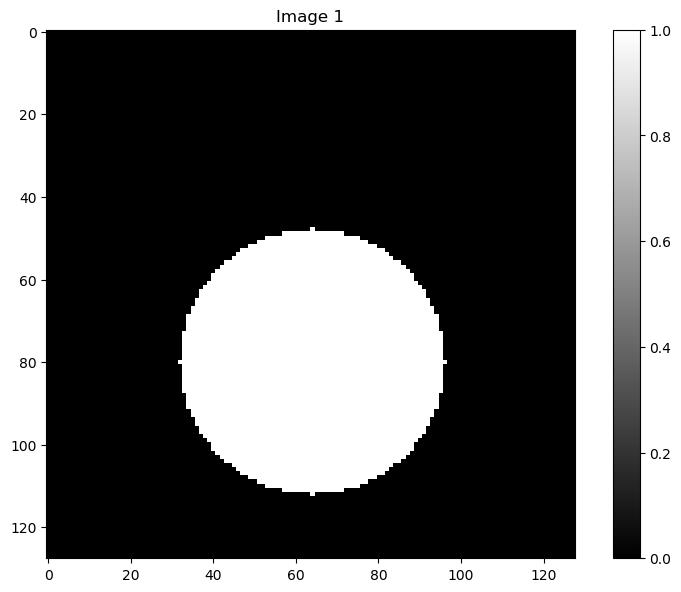

In [56]:
for n in range(J.shape[0]):
    plt.figure()
    plt.imshow(J[n,...].get().squeeze(), cmap='gray')
    plt.title(f'Image {n}')
    _=plt.colorbar()

In [67]:
fluid_params = [.1, .01, .001]
atlas = lm.Atlas(J, fluid_params)
%time atlas.build(step_size=.1, num_iters=200, constrain_mean_momentum_zero=1)#, callbacks=[])

Iteration   0 of 200 SSE=   1008.00 |m|^2=      0.00 E=   1008.00
Iteration   1 of 200 SSE=   1003.83 |m|^2=      0.00 E=   1003.83
Iteration   2 of 200 SSE=   1000.17 |m|^2=      0.00 E=   1000.17
Iteration   3 of 200 SSE=    996.81 |m|^2=      0.00 E=    996.81
Iteration   4 of 200 SSE=    993.70 |m|^2=      0.00 E=    993.70
Iteration   5 of 200 SSE=    990.75 |m|^2=      0.00 E=    990.75
Iteration   6 of 200 SSE=    987.93 |m|^2=      0.00 E=    987.93
Iteration   7 of 200 SSE=    985.17 |m|^2=      0.00 E=    985.17
Iteration   8 of 200 SSE=    982.45 |m|^2=      0.00 E=    982.45
Iteration   9 of 200 SSE=    979.72 |m|^2=      0.00 E=    979.72
Iteration  10 of 200 SSE=    976.95 |m|^2=      0.00 E=    976.95
Iteration  11 of 200 SSE=    974.11 |m|^2=      0.00 E=    974.11
Iteration  12 of 200 SSE=    971.19 |m|^2=      0.00 E=    971.19
Iteration  13 of 200 SSE=    968.16 |m|^2=      0.00 E=    968.16
Iteration  14 of 200 SSE=    965.00 |m|^2=      0.00 E=    965.00
Iteration 

Iteration 125 of 200 SSE=    450.03 |m|^2=      0.20 E=    450.24
Iteration 126 of 200 SSE=    445.65 |m|^2=      0.20 E=    445.85
Iteration 127 of 200 SSE=    441.22 |m|^2=      0.21 E=    441.43
Iteration 128 of 200 SSE=    436.77 |m|^2=      0.21 E=    436.98
Iteration 129 of 200 SSE=    432.24 |m|^2=      0.21 E=    432.46
Iteration 130 of 200 SSE=    427.66 |m|^2=      0.22 E=    427.88
Iteration 131 of 200 SSE=    423.13 |m|^2=      0.22 E=    423.35
Iteration 132 of 200 SSE=    418.63 |m|^2=      0.22 E=    418.85
Iteration 133 of 200 SSE=    414.21 |m|^2=      0.22 E=    414.44
Iteration 134 of 200 SSE=    409.93 |m|^2=      0.23 E=    410.16
Iteration 135 of 200 SSE=    405.75 |m|^2=      0.23 E=    405.98
Iteration 136 of 200 SSE=    401.86 |m|^2=      0.23 E=    402.09
Iteration 137 of 200 SSE=    398.17 |m|^2=      0.24 E=    398.41
Iteration 138 of 200 SSE=    394.70 |m|^2=      0.24 E=    394.93
Iteration 139 of 200 SSE=    391.39 |m|^2=      0.24 E=    391.63
Iteration 

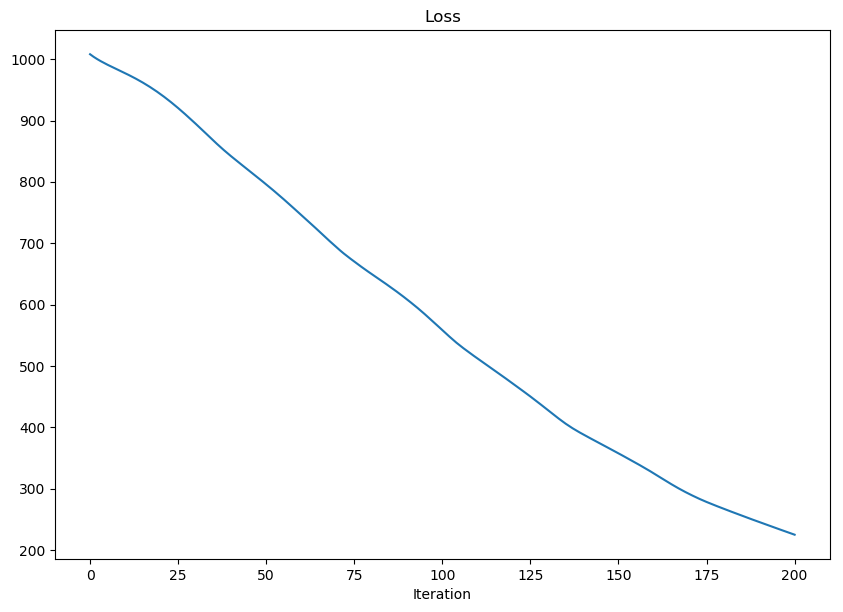

In [68]:
plt.plot(atlas.loss)
plt.xlabel('Iteration')
_=plt.title('Loss')

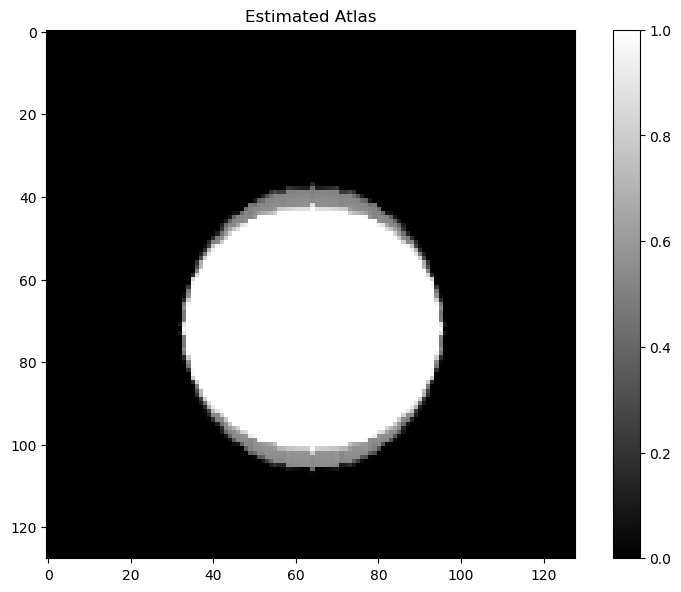

In [69]:
plt.imshow(atlas.base_image.get().squeeze(), cmap='gray')
plt.colorbar()
_=plt.title('Estimated Atlas')

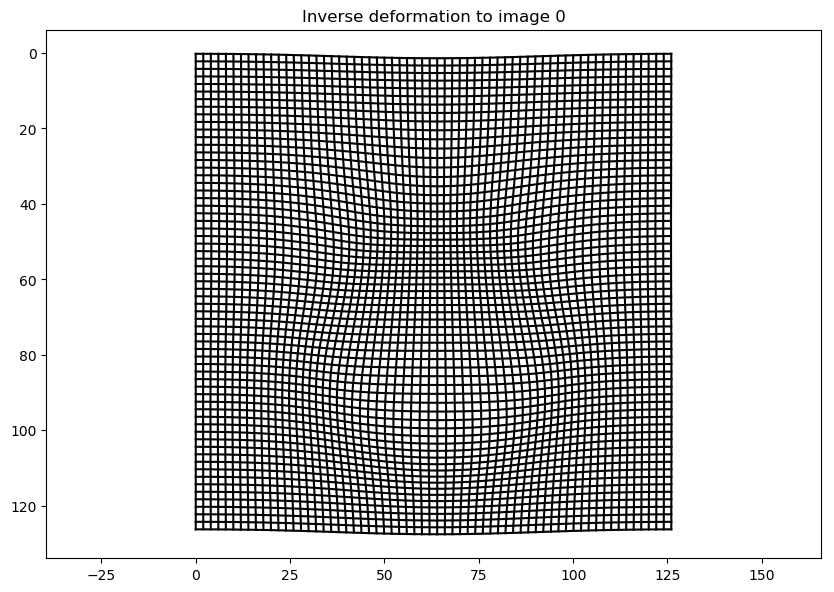

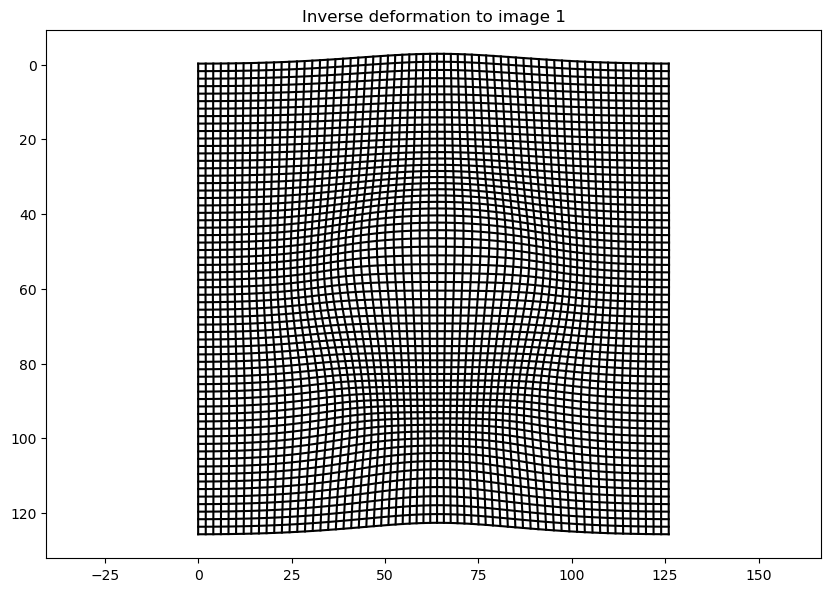

In [70]:
h = lm.expmap(atlas.m, atlas.metric)
for i in range(h.shape[0]):
    plt.figure()
    lm.gridplot(h.get()[[i],...])
    plt.title(f'Inverse deformation to image {i}')

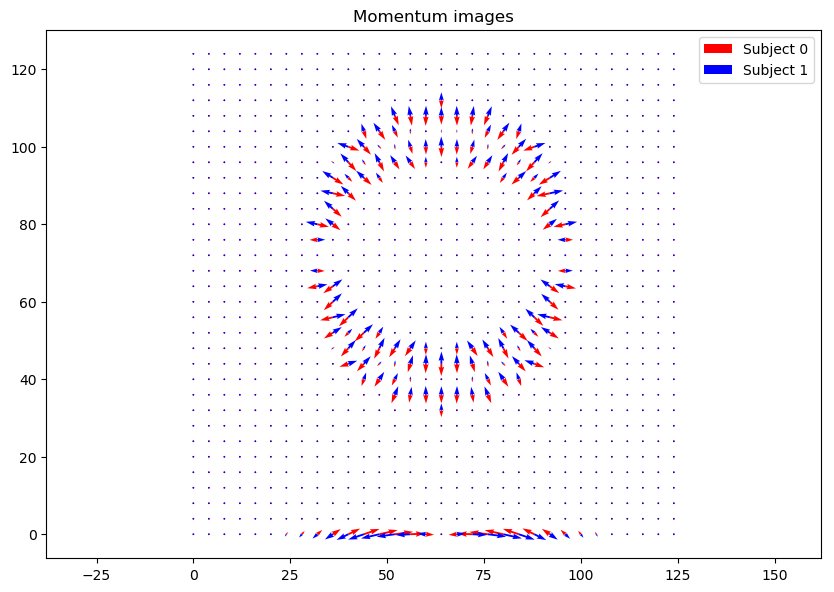

In [72]:
colors='rbg'
for i in range(atlas.m.shape[0]):
    lm.quiver(atlas.m.get()[[i],...]*100000, color=colors[i], label=f'Subject {i}')
    plt.title(f'Momentum images')
_=plt.legend()